# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
from tensorflow.keras.preprocessing import image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size=  (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1322 images belonging to 1 classes.
Found 150 images belonging to 1 classes.


In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [ ]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# Compiling the CNN
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
42/42 [==============================] - 222s 5s/step - loss: 262.7663 - accuracy: 0.0068 - val_loss: 529.1832 - val_accuracy: 0.0000e+00
Epoch 2/10
42/42 [==============================] - 239s 6s/step - loss: 916.4030 - accuracy: 0.1959 - val_loss: 1751.5935 - val_accuracy: 0.0000e+00
Epoch 3/10
42/42 [==============================] - 303s 7s/step - loss: 6804.1084 - accuracy: 0.2186 - val_loss: 17108.8984 - val_accuracy: 1.0000
Epoch 4/10
42/42 [==============================] - 298s 7s/step - loss: 36401.7539 - accuracy: 0.2784 - val_loss: 103947.2656 - val_accuracy: 0.0000e+00
Epoch 5/10
42/42 [==============================] - 299s 7s/step - loss: 95070.3672 - accuracy: 0.2451 - val_loss: 89708.3203 - val_accuracy: 0.0000e+00
Epoch 6/10
42/42 [==============================] - 298s 7s/step - loss: 191547.2500 - accuracy: 0.2496 - val_loss: 237005.2344 - val_accuracy: 0.0000e+00
Epoch 7/10
42/42 [==============================] - 297s 7s/step - loss: 365803.0000 - accu

In [ ]:
test_image = image.load_img('C:\\Users\\Dell\\Desktop\\DEEP\\Test\\Test\\Healthy\\8ddaa5a5caa5caa8.jpg',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 350ms/step


In [ ]:
result


array([[1., 0., 0., 0.]], dtype=float32)

In [ ]:
result = result.ravel()


In [ ]:
result


array([1., 0., 0., 0.], dtype=float32)

In [ ]:
print("Largest element is:", max(result))


Largest element is: 1.0


In [ ]:
result.sort
result

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
result=result.tolist()


In [ ]:
result1=["Heathy","Powdery","Rust"]
max = result[0];

#Loop through the array
for i in range(0, len(result)):
    #Compare elements of array with max
    if(result[i] > max):
        max = result[i];

print("Largest element present in given array: " + str(max) +" And it belongs to " +str(result1[2]) +" class.");

Largest element present in given array: 1.0 And it belongs to freash_leaf class.


# Xception

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/Train'
valid_dir = '/content/drive/MyDrive/Validation'
test_dir = '/content/drive/MyDrive/Test'


In [ ]:
# Data processing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(299, 299),  # Xception input size
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              target_size=(299, 299),
                                                              batch_size=32,
                                                              class_mode='binary')



Found 1322 images belonging to 1 classes.
Found 60 images belonging to 1 classes.


In [ ]:
# Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


83683744/83683744 [==============================] - 5s 0us/step


In [ ]:

# Create a custom model on top of Xception
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21123881 (80.58 MB)
Trainable params: 21069353 (80.37 MB)
Non-trainable params: 54528 (213.00 KB)
__________

In [ ]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)



Epoch 1/10
41/41 [==============================] - 1305s 31s/step - loss: 0.0289 - accuracy: 0.9775 - val_loss: 3.3521e-09 - val_accuracy: 1.0000
Epoch 2/10
41/41 [==============================] - 124s 3s/step - loss: 3.3818e-06 - accuracy: 1.0000 - val_loss: 4.5416e-10 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 122s 3s/step - loss: 2.0861e-06 - accuracy: 1.0000 - val_loss: 7.7776e-10 - val_accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 136s 3s/step - loss: 3.7291e-06 - accuracy: 1.0000 - val_loss: 1.4544e-09 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 141s 3s/step - loss: 6.8283e-07 - accuracy: 1.0000 - val_loss: 1.5846e-09 - val_accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 126s 3s/step - loss: 3.6388e-07 - accuracy: 1.0000 - val_loss: 1.6382e-09 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 124s 3s/step - loss: 2.1383e-07 - accuracy: 1.0000 - val

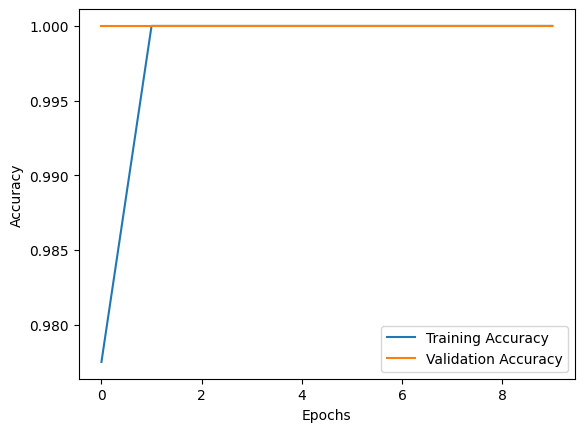

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(299, 299),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


# InceptionV3

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [3]:
# Define paths
train_dir = '/content/drive/MyDrive/Train'
valid_dir = '/content/drive/MyDrive/Validation'
test_dir = '/content/drive/MyDrive/Test'

# Data processing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(299, 299),  # InceptionV3 input size
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              target_size=(299, 299),
                                                              batch_size=32,
                                                              class_mode='binary')



Found 1322 images belonging to 1 classes.
Found 60 images belonging to 1 classes.


In [5]:
# InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))



87910968/87910968 [==============================] - 3s 0us/step


In [6]:
# Create a custom model on top of InceptionV3
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [8]:
# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22065185 (84.17 MB)
Trainable params: 22030753 (84.04 MB)
Non-trainable params: 34432 (134.50 KB)
__________

In [9]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)




Epoch 1/10
41/41 [==============================] - 644s 14s/step - loss: 0.0118 - accuracy: 0.9992 - val_loss: 2.7417e-11 - val_accuracy: 1.0000
Epoch 2/10
41/41 [==============================] - 142s 3s/step - loss: 1.5522e-08 - accuracy: 1.0000 - val_loss: 7.2383e-12 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 129s 3s/step - loss: 3.1785e-08 - accuracy: 1.0000 - val_loss: 4.1288e-11 - val_accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 128s 3s/step - loss: 8.7803e-09 - accuracy: 1.0000 - val_loss: 5.5210e-11 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 120s 3s/step - loss: 6.4695e-08 - accuracy: 1.0000 - val_loss: 9.4019e-11 - val_accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 126s 3s/step - loss: 1.1095e-08 - accuracy: 1.0000 - val_loss: 2.8027e-10 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 123s 3s/step - loss: 1.8944e-08 - accuracy: 1.0000 - val_

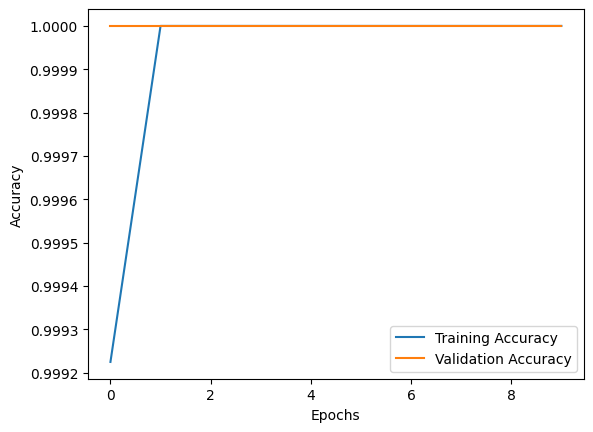

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [11]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(299, 299),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

Found 150 images belonging to 1 classes.
4/4 [==============================] - 59s 19s/step - loss: 3.2246e-10 - accuracy: 1.0000
Test Accuracy: 100.00%


# EfficientNet

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [4]:
# Define paths
train_dir = '/content/drive/MyDrive/Train'
valid_dir = '/content/drive/MyDrive/Validation'
test_dir = '/content/drive/MyDrive/Test'

In [5]:
# Data processing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),  # EfficientNet input size
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              target_size=(224, 224),
                                                              batch_size=32,
                                                              class_mode='binary')



Found 1322 images belonging to 1 classes.
Found 60 images belonging to 1 classes.


In [6]:
# EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



16705208/16705208 [==============================] - 0s 0us/step


In [7]:
# Create a custom model on top of EfficientNetB0
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [9]:
# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4213668 (16.07 MB)
Trainable params: 41716

In [10]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)


Epoch 1/10
41/41 [==============================] - 456s 10s/step - loss: 0.0329 - accuracy: 0.9860 - val_loss: 1.0248e-09 - val_accuracy: 1.0000
Epoch 2/10
41/41 [==============================] - 98s 2s/step - loss: 6.7285e-06 - accuracy: 1.0000 - val_loss: 1.3034e-06 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 102s 2s/step - loss: 2.5152e-06 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 104s 3s/step - loss: 3.7654e-06 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 99s 2s/step - loss: 1.4666e-06 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 100s 2s/step - loss: 1.6034e-06 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 99s 2s/step - loss: 1.9049e-06 - accuracy: 1.0000 - val_loss: 0.0013 - val_

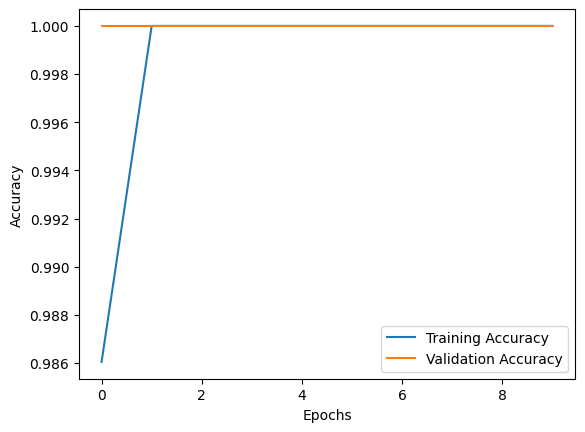

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Found 150 images belonging to 1 classes.
4/4 [==============================] - 41s 13s/step - loss: 9.5159e-07 - accuracy: 1.0000
Test Accuracy: 100.00%
